# Spectral Indices

## Observing vegetation health from space

When working with multispectral data, the individual reflectance values
do not tell us much, but their relationships do. A normalized **spectral
index** is a way of measuring the relationship between two (or more)
bands.

We will look vegetation cover using NDVI (Normalized Difference
Vegetation Index). How does it work? First, we need to learn about
spectral reflectance signatures.

Every object reflects some wavelengths of light more or less than
others. We can see this with our eyes, since, for example, plants
reflect a lot of green in the summer, and then as that green diminishes
in the fall they look more yellow or orange. The image below shows
spectral signatures for water, soil, and vegetation:

![](https://seos-project.eu/remotesensing/images/Reflexionskurven.jpg)
\> Image source: [SEOS
Project](https://seos-project.eu/remotesensing/remotesensing-c01-p06.html)

**Healthy vegetation** reflects a lot of **Near-InfraRed (NIR)**
radiation. Less healthy vegetation reflects a similar amounts of the
visible light spectra, but less NIR radiation. We don’t see a huge drop
in Green radiation until the plant is very stressed or dead. That means
that NIR allows us to get ahead of what we can see with our eyes.

![Healthy leaves reflect a lot of NIR radiation compared to dead or
stressed
leaves](attachment:../../img/earth-analytics/remote-sensing/spectral_vegetation_stress.png)
\> Image source: [Spectral signature literature review by
px39n](https://github.com/px39n/Awesome-Vegetation-Index)

Different species of plants reflect different spectral signatures, but
the *pattern* of the signatures are similar. NDVI compares the amount of
NIR reflectance to the amount of Red reflectance, thus accounting for
many of the species differences and isolating the health of the plant.
The formula for calculating NDVI is:

$$NDVI = \frac{(NIR - Red)}{(NIR + Red)}$$

Read more about NDVI and other vegetation indices:

-   [earthdatascience.org](https://www.earthdatascience.org/courses/use-data-open-source-python/multispectral-remote-sensing/vegetation-indices-in-python/calculate-NDVI-python/)
-   [USGS](https://www.usgs.gov/landsat-missions/landsat-surface-reflectance-derived-spectral-indices)

In [2]:
store -r band_dict

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Calculate NDVI</div></div><div class="callout-body-container callout-body"></div></div>

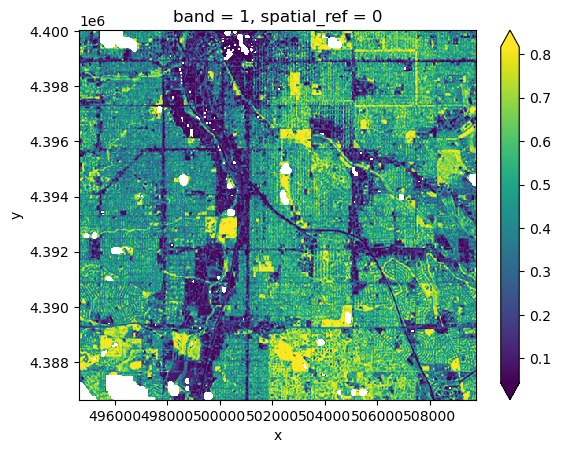

In [3]:
#band_dict['nir'].rio.nodata
ndvi_dat = (
    (band_dict['nir'] - band_dict['red']) /
     (band_dict['nir'] + band_dict['red'])
)
ndvi_dat.plot(robust=True)

In [4]:
%store ndvi_dat

Stored 'ndvi_dat' (DataArray)


<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-extra"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Looking for an Extra Challenge?: Calculate another index</div></div><div class="callout-body-container callout-body"><p>You can also calculating other indices that you find on the internet
or in the scientific literature. Some common ones in this context might
be the NDMI (moisture), NDBaI (bareness), or the NDBI (built-up).</p></div></div>

In [5]:
band_dict

{'aerosol': <xarray.DataArray (y: 447, x: 504)> Size: 901kB
 array([[0.0516    , 0.0686    , 0.0611    , ..., 0.0684    , 0.0598    ,
         0.0395    ],
        [0.0515    , 0.06439999, 0.0489    , ..., 0.0724    , 0.0675    ,
         0.0445    ],
        [0.0616    , 0.0581    , 0.0534    , ..., 0.0728    , 0.0616    ,
         0.0495    ],
        ...,
        [       nan,        nan,        nan, ..., 0.0633    , 0.0405    ,
         0.0395    ],
        [       nan,        nan,        nan, ..., 0.05      , 0.0359    ,
         0.0308    ],
        [       nan,        nan,        nan, ..., 0.0521    , 0.0489    ,
         0.0512    ]], dtype=float32)
 Coordinates:
     band         int64 8B 1
   * x            (x) float64 4kB 4.947e+05 4.947e+05 ... 5.097e+05 5.097e+05
   * y            (y) float64 4kB 4.4e+06 4.4e+06 4.4e+06 ... 4.387e+06 4.387e+06
     spatial_ref  int64 8B 0
 Attributes: (12/33)
     ACCODE:                    Lasrc; Lasrc
     arop_ave_xshift(meters):   0, 0


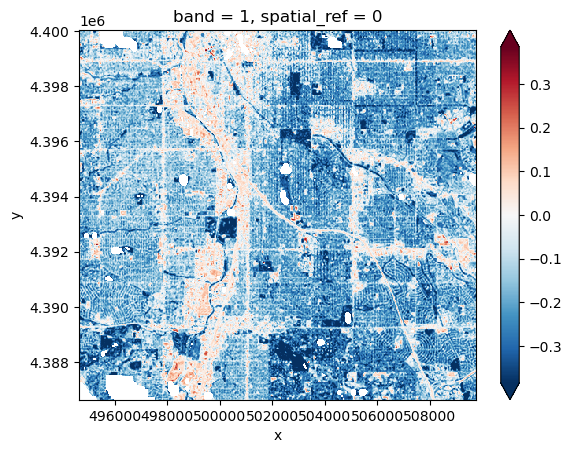

In [6]:
# Landsat 8 NDBI = (Band 6 – Band 5) / (Band 6 + Band 5)
ndbi_dat = (
    (band_dict['swir1'] - band_dict['nir']) /
     (band_dict['swir1'] + band_dict['nir'])
)
ndbi_dat.plot(robust=True)

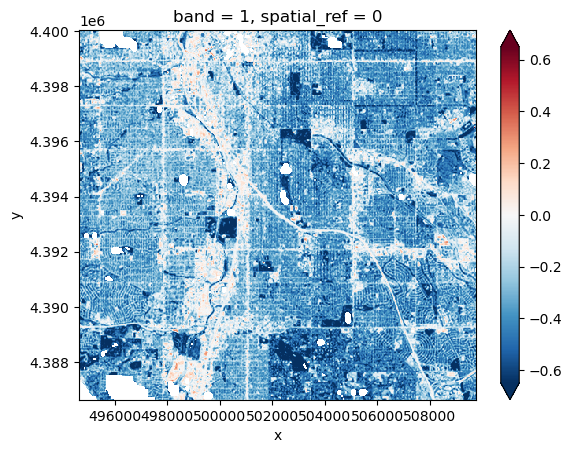

In [7]:
# Landsat 8 NDBI test of (Band 7 – Band 5) / (Band 7 + Band 5)
ndbi2_dat = (
    (band_dict['swir2'] - band_dict['nir']) /
     (band_dict['swir2'] + band_dict['nir'])
)
ndbi2_dat.plot(robust=True)